# Document Splitting

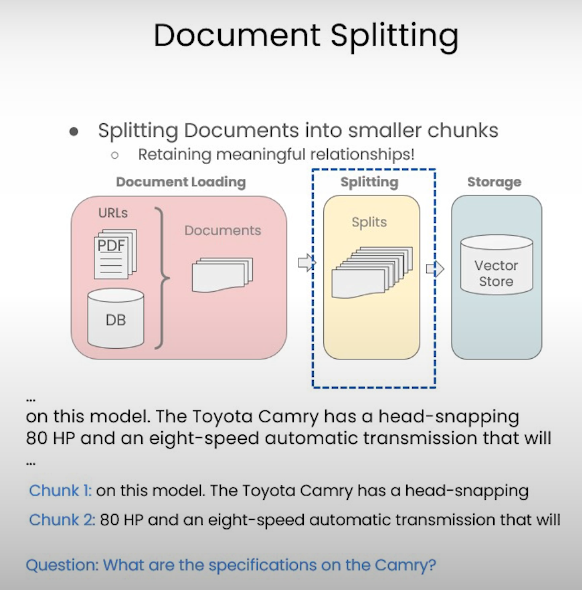

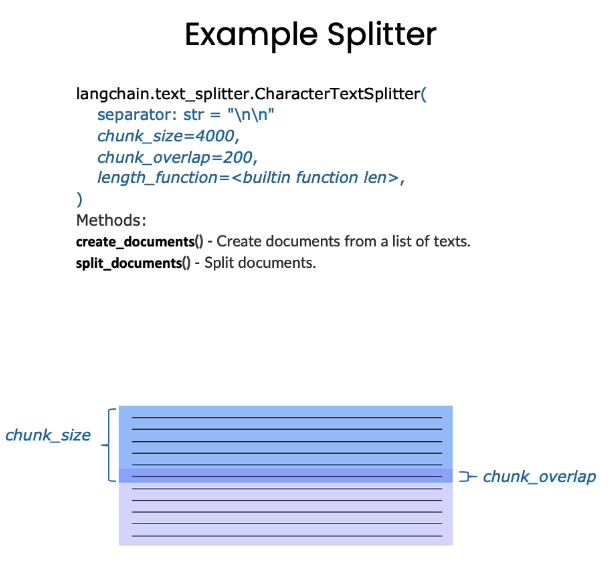

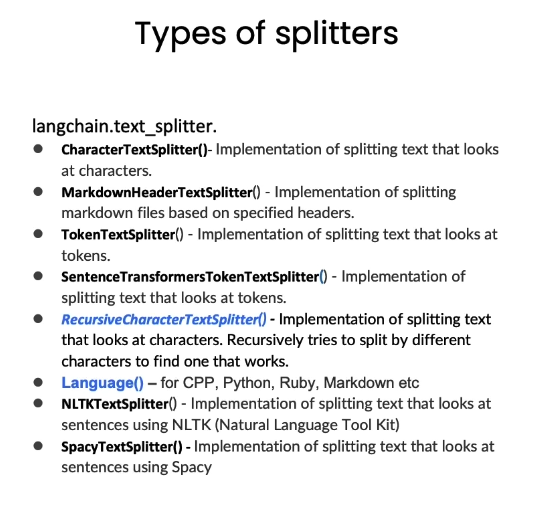

In [2]:
from langchain_text_splitters import RecursiveCharacterTextSplitter, CharacterTextSplitter

In [3]:
chunk_size =26
chunk_overlap = 4

In [4]:
r_splitter = RecursiveCharacterTextSplitter(
    chunk_size=chunk_size,
    chunk_overlap=chunk_overlap
)
c_splitter = CharacterTextSplitter(
    chunk_size=chunk_size,
    chunk_overlap=chunk_overlap
)

Why doesn't this split the string below?

In [5]:
text1 = 'abcdefghijklmnopqrstuvwxyz'

In [6]:
r_splitter.split_text(text1) # chunk size is 26

['abcdefghijklmnopqrstuvwxyz']

In [7]:
text2 = 'abcdefghijklmnopqrstuvwxyzabcdefg'

In [8]:
r_splitter.split_text(text2)

['abcdefghijklmnopqrstuvwxyz', 'wxyzabcdefg']

In [9]:
text3 = "a b c d e f g h i j k l m n o p q r s t u v w x y z"

In [10]:
r_splitter.split_text(text3)

['a b c d e f g h i j k l m', 'l m n o p q r s t u v w x', 'w x y z']

In [11]:
c_splitter.split_text(text3)

['a b c d e f g h i j k l m n o p q r s t u v w x y z']

In [12]:
c_splitter = CharacterTextSplitter(
    chunk_size=chunk_size,
    chunk_overlap=chunk_overlap,
    separator = ' ' # default is split by '\n'
)
c_splitter.split_text(text3)

['a b c d e f g h i j k l m', 'l m n o p q r s t u v w x', 'w x y z']

## Recursive splitting details

`RecursiveCharacterTextSplitter` is recommended for generic text. 

In [13]:
some_text = """When writing documents, writers will use document structure to group content. \
This can convey to the reader, which idea's are related. For example, closely related ideas \
are in sentances. Similar ideas are in paragraphs. Paragraphs form a document. \n\n  \
Paragraphs are often delimited with a carriage return or two carriage returns. \
Carriage returns are the "backslash n" you see embedded in this string. \
Sentences have a period at the end, but also, have a space.\
and words are separated by space."""

In [14]:
len(some_text)

496

In [15]:
c_splitter = CharacterTextSplitter(
    chunk_size=450,
    chunk_overlap=0,
    separator = ' '
)
r_splitter = RecursiveCharacterTextSplitter(
    chunk_size=450,
    chunk_overlap=0, 
    separators=["\n\n", "\n", " ", ""] # What this means is that when we try to split the text,
    # it will first try to split by "\n\n", 
    # then if still need to split to individual chunks, it will try to split by "\n",
    # then if still need to split to individual chunks, it will try to split by " ",
    # then if still need to split to individual chunks, it will try to split by "" (character by character)
)

In [16]:
c_splitter.split_text(some_text)

['When writing documents, writers will use document structure to group content. This can convey to the reader, which idea\'s are related. For example, closely related ideas are in sentances. Similar ideas are in paragraphs. Paragraphs form a document. \n\n Paragraphs are often delimited with a carriage return or two carriage returns. Carriage returns are the "backslash n" you see embedded in this string. Sentences have a period at the end, but also,',
 'have a space.and words are separated by space.']

In [17]:
r_splitter.split_text(some_text) 
# it will split the text by "\n\n", then by "\n", then by " ", then by "", 
# in this case , it split on "\n\n", even though , the first chunk is less than 450 characters

["When writing documents, writers will use document structure to group content. This can convey to the reader, which idea's are related. For example, closely related ideas are in sentances. Similar ideas are in paragraphs. Paragraphs form a document.",
 'Paragraphs are often delimited with a carriage return or two carriage returns. Carriage returns are the "backslash n" you see embedded in this string. Sentences have a period at the end, but also, have a space.and words are separated by space.']

Let's reduce the chunk size a bit and add a period to our separators:

In [20]:
r_splitter = RecursiveCharacterTextSplitter(
    chunk_size=150,
    chunk_overlap=0,
    separators=["\n\n", "\n", ". ", " ", ""]
)
r_splitter.split_text(some_text)

["When writing documents, writers will use document structure to group content. This can convey to the reader, which idea's are related",
 '. For example, closely related ideas are in sentances. Similar ideas are in paragraphs. Paragraphs form a document.',
 'Paragraphs are often delimited with a carriage return or two carriage returns',
 '. Carriage returns are the "backslash n" you see embedded in this string',
 '. Sentences have a period at the end, but also, have a space.and words are separated by space.']

In [23]:
r_splitter = RecursiveCharacterTextSplitter(
    chunk_size=150,
    chunk_overlap=0,
    is_separator_regex=True,
    separators=["\n\n", "\n", "(?<=\. )", " ", ""] # ?<= is a positive lookbehind assertion, which means it will search for a period followed by a space
)
r_splitter.split_text(some_text)

["When writing documents, writers will use document structure to group content. This can convey to the reader, which idea's are related.",
 'For example, closely related ideas are in sentances. Similar ideas are in paragraphs. Paragraphs form a document.',
 'Paragraphs are often delimited with a carriage return or two carriage returns.',
 'Carriage returns are the "backslash n" you see embedded in this string.',
 'Sentences have a period at the end, but also, have a space.and words are separated by space.']

In [24]:
from langchain_community.document_loaders import PyPDFLoader
loader = PyPDFLoader("data/docs/cs229_lectures/MachineLearning-Lecture01.pdf")
pages = loader.load()

In [25]:
from langchain_text_splitters import CharacterTextSplitter
text_splitter = CharacterTextSplitter(
    separator="\n",
    chunk_size=1000,
    chunk_overlap=150,
    length_function=len # length of the character (default is len)
)

In [26]:
docs = text_splitter.split_documents(pages)

In [27]:
len(docs)

77

In [28]:
len(pages)

22

In [29]:
from langchain_community.document_loaders import NotionDirectoryLoader
loader = NotionDirectoryLoader("data/docs/Notion_DB")
notion_db = loader.load()

In [30]:
docs = text_splitter.split_documents(notion_db)

In [31]:
len(notion_db)

52

In [32]:
len(docs)

365

## Token splitting

We can also split on token count explicity, if we want.

This can be useful because LLMs often have context windows designated in tokens.

Tokens are often ~4 characters.

In [33]:
from langchain_text_splitters import TokenTextSplitter

In [34]:
text_splitter = TokenTextSplitter(chunk_size=1, chunk_overlap=0)

In [35]:
text1 = "foo bar bazzyfoo"

In [36]:
text_splitter.split_text(text1)

['foo', ' bar', ' b', 'az', 'zy', 'foo']

In [37]:
text_splitter = TokenTextSplitter(chunk_size=10, chunk_overlap=0)

In [38]:
docs = text_splitter.split_documents(pages)

In [39]:
docs[0]

Document(metadata={'source': 'data/docs/cs229_lectures/MachineLearning-Lecture01.pdf', 'page': 0}, page_content='MachineLearning-Lecture01  \n')

In [40]:
pages[0].metadata

{'source': 'data/docs/cs229_lectures/MachineLearning-Lecture01.pdf', 'page': 0}

## Context aware splitting

Chunking aims to keep text with common context together.

A text splitting often uses sentences or other delimiters to keep related text together but many documents (such as Markdown) have structure (headers) that can be explicitly used in splitting.

We can use `MarkdownHeaderTextSplitter` to preserve header metadata in our chunks, as show below.

In [41]:
from langchain_community.document_loaders import NotionDirectoryLoader
from langchain_text_splitters import MarkdownHeaderTextSplitter

In [42]:
markdown_document = """# Title\n\n \
## Chapter 1\n\n \
Hi this is Jim\n\n Hi this is Joe\n\n \
### Section \n\n \
Hi this is Lance \n\n 
## Chapter 2\n\n \
Hi this is Molly"""

In [43]:
headers_to_split_on = [
    ("#", "Header 1"),
    ("##", "Header 2"),
    ("###", "Header 3"),
]

In [44]:
markdown_splitter = MarkdownHeaderTextSplitter(
    headers_to_split_on=headers_to_split_on
)
md_header_splits = markdown_splitter.split_text(markdown_document)

In [45]:
md_header_splits[0]

Document(metadata={'Header 1': 'Title', 'Header 2': 'Chapter 1'}, page_content='Hi this is Jim  \nHi this is Joe')

In [46]:
md_header_splits[1]

Document(metadata={'Header 1': 'Title', 'Header 2': 'Chapter 1', 'Header 3': 'Section'}, page_content='Hi this is Lance')

In [47]:
md_header_splits[2]

Document(metadata={'Header 1': 'Title', 'Header 2': 'Chapter 2'}, page_content='Hi this is Molly')

Try on a real Markdown file, like a Notion database.

In [48]:
loader = NotionDirectoryLoader("data/docs/Notion_DB")
docs = loader.load()
txt = ' '.join([d.page_content for d in docs])

In [49]:
txt

'# Blendle\'s Employee Handbook\n\nThis is a living document with everything we\'ve learned working with people while running a startup. And, of course, we continue to learn. Therefore it\'s a document that will continue to change. \n\n**Everything related to working at Blendle and the people of Blendle, made public.**\n\nThese are the lessons from three years of working with the people of Blendle. It contains everything from [how our leaders lead](https://www.notion.so/ecfb7e647136468a9a0a32f1771a8f52?pvs=21) to [how we increase salaries](https://www.notion.so/Salary-Review-e11b6161c6d34f5c9568bb3e83ed96b6?pvs=21), from [how we hire](https://www.notion.so/Hiring-451bbcfe8d9b49438c0633326bb7af0a?pvs=21) and [fire](https://www.notion.so/Firing-5567687a2000496b8412e53cd58eed9d?pvs=21) to [how we think people should give each other feedback](https://www.notion.so/Our-Feedback-Process-eb64f1de796b4350aeab3bc068e3801f?pvs=21) — and much more.\n\nWe\'ve made this document public because we w

In [50]:
headers_to_split_on = [
    ("#", "Header 1"),
    ("##", "Header 2"),
]
markdown_splitter = MarkdownHeaderTextSplitter(
    headers_to_split_on=headers_to_split_on
)

In [51]:
md_header_splits = markdown_splitter.split_text(txt)

In [52]:
md_header_splits[0]

Document(metadata={'Header 1': "Blendle's Employee Handbook"}, page_content="This is a living document with everything we've learned working with people while running a startup. And, of course, we continue to learn. Therefore it's a document that will continue to change.  \n**Everything related to working at Blendle and the people of Blendle, made public.**  \nThese are the lessons from three years of working with the people of Blendle. It contains everything from [how our leaders lead](https://www.notion.so/ecfb7e647136468a9a0a32f1771a8f52?pvs=21) to [how we increase salaries](https://www.notion.so/Salary-Review-e11b6161c6d34f5c9568bb3e83ed96b6?pvs=21), from [how we hire](https://www.notion.so/Hiring-451bbcfe8d9b49438c0633326bb7af0a?pvs=21) and [fire](https://www.notion.so/Firing-5567687a2000496b8412e53cd58eed9d?pvs=21) to [how we think people should give each other feedback](https://www.notion.so/Our-Feedback-Process-eb64f1de796b4350aeab3bc068e3801f?pvs=21) — and much more.  \nWe've 

In [53]:
md_header_splits[1]

Document(metadata={'Header 1': "Blendle's Employee Handbook", 'Header 2': 'Blendle general'}, page_content="*Information gap closing in 3... 2... 1...*  \n---  \n[To Do/Read in your first week](Blendle's%20Employee%20Handbook%20dbb455f918db4cc9b3de9108622d76ef/To%20Do%20Read%20in%20your%20first%20week%204d3992590c9e4ab4a0b06b2a230a61f2.md)  \n[History](Blendle's%20Employee%20Handbook%20dbb455f918db4cc9b3de9108622d76ef/History%20db212e52dc2c4819b61811b45a3b1d28.md)  \n[DNA & culture](Blendle's%20Employee%20Handbook%20dbb455f918db4cc9b3de9108622d76ef/DNA%20&%20culture%20f6e1dc5bf9e94e72a2ef0bc2ef1a3879.md)  \n[General & practical ](Blendle's%20Employee%20Handbook%20dbb455f918db4cc9b3de9108622d76ef/General%20&%20practical%20bcdd58220d134cd79eb074c42ebd8956.md)")

In [54]:
md_header_splits[2]

Document(metadata={'Header 1': "Blendle's Employee Handbook", 'Header 2': 'People operations'}, page_content="*You can tell a company's DNA by looking at how they deal with the practical stuff.*  \n---  \n[Office](Blendle's%20Employee%20Handbook%20dbb455f918db4cc9b3de9108622d76ef/Office%20b03ec31557c24eb7a5b9dc80caf327e0.md)  \n[Time off: holidays and national holidays](Blendle's%20Employee%20Handbook%20dbb455f918db4cc9b3de9108622d76ef/Time%20off%20holidays%20and%20national%20holidays%20be27c9c4608746e79deec439aa3bcd13.md)  \n[Calling in sick/better](Blendle's%20Employee%20Handbook%20dbb455f918db4cc9b3de9108622d76ef/Calling%20in%20sick%20better%20a8721d5ec9d54d79acf644016e3d1aa9.md)  \n[Perks and benefits](Blendle's%20Employee%20Handbook%20dbb455f918db4cc9b3de9108622d76ef/Perks%20and%20benefits%20146f031e68a74282bfb477e4a5912b71.md)  \n[Travel costs and reimbursements](Blendle's%20Employee%20Handbook%20dbb455f918db4cc9b3de9108622d76ef/Travel%20costs%20and%20reimbursements%20bc9e11d7d21

In [55]:
md_header_splits[3]

Document(metadata={'Header 1': "Blendle's Employee Handbook", 'Header 2': 'People topics'}, page_content="*Themes we care about.*  \n---  \n[Blendle Social Code](Blendle's%20Employee%20Handbook%20dbb455f918db4cc9b3de9108622d76ef/Blendle%20Social%20Code%2008a15f47fdb643dea853c7aaa77e6d1c.md)  \n[Diversity and inclusion](Blendle's%20Employee%20Handbook%20dbb455f918db4cc9b3de9108622d76ef/Diversity%20and%20inclusion%20d1a417e614c04af08b1bd851520d929b.md)  \n[#letstalkaboutstress](Blendle's%20Employee%20Handbook%20dbb455f918db4cc9b3de9108622d76ef/#letstalkaboutstress%204cda4e49a0ff446e9e635b08d50170df.md)")